In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential , Model
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Flatten , Dense , Dropout
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# CıFAR-10 a very popular dataset
# Total 60k pictures from 10 different classes.

cifar10 = tf.keras.datasets.cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()


X_train, X_test = X_train / 255.0, X_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()


print("Train pictures shape:", X_train.shape)
print("Test labels shape:", y_train.shape)
print("Test pictures shape:", X_test.shape)

Train pictures shape: (50000, 32, 32, 3)
Test labels shape: (50000,)
Test pictures shape: (10000, 32, 32, 3)


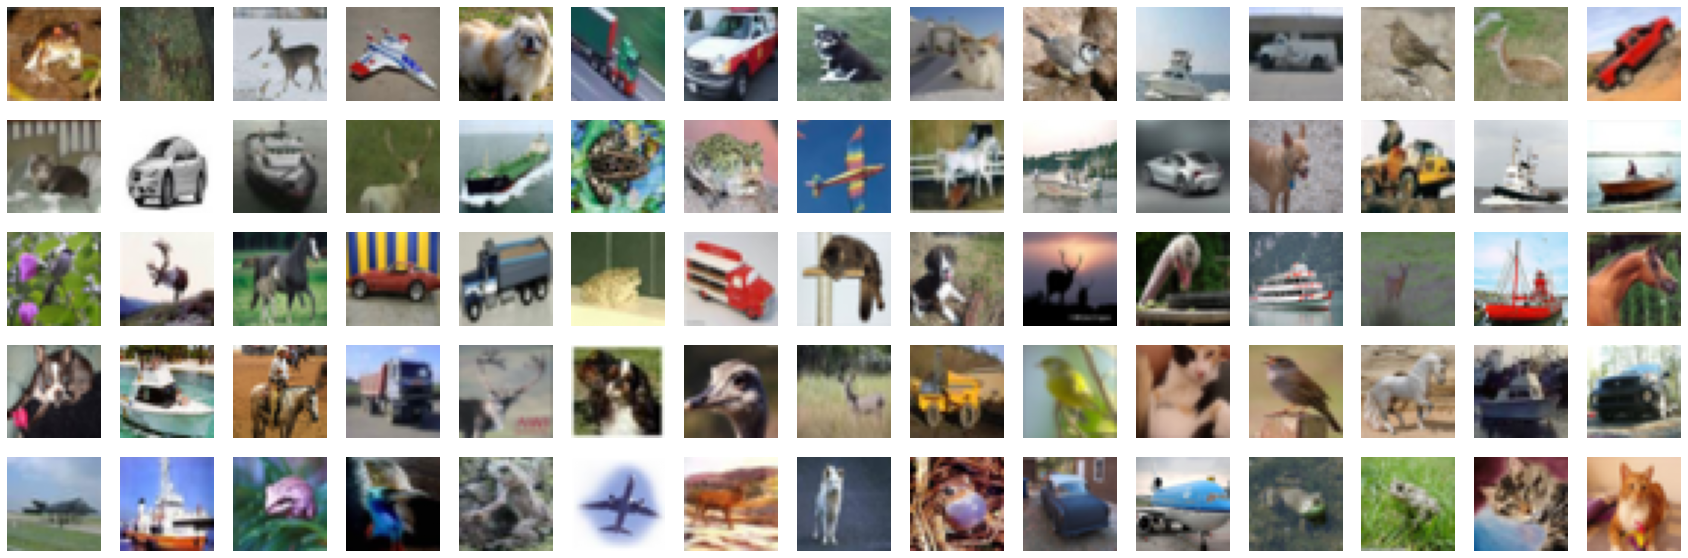

In [3]:
fig = plt.figure(figsize=(30,10))

for i in range(75):

    plt.subplot(5, 15, i+1)

    plt.imshow(X_train[i*10])
    
    plt.axis('off')

plt.show()

In [4]:
# model = tf.keras.models.Sequential([
#   tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(32, 32, 3)),
#   tf.keras.layers.MaxPooling2D(2,2),
#   tf.keras.layers.Flatten(),

#   tf.keras.layers.Dense(512, activation='relu'),
#   tf.keras.layers.Dropout(0.2),
#   tf.keras.layers.Dense(10, activation='softmax')
# ])

In [5]:
model = Sequential()

model.add(Conv2D(filters = 32 , kernel_size = 3 , activation = 'relu' , input_shape = (32 , 32 , 3) ))
# model.add(Conv2D(filters = 32 , kernel_size = 3 , activation = 'relu' ))
model.add(MaxPooling2D(2))
model.add(Flatten())

model.add(Dense(512 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10 , activation = 'softmax'))

In [6]:
i = tf.keras.Input(shape=(32,32,3))
x = tf.keras.layers.Conv2D(filters = 32,kernel_size = (3,3),activation='relu')(i)
x = tf.keras.layers.MaxPooling2D(2,2)(x)
x = tf.keras.layers.Flatten()(x)

x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x) 
out = tf.keras.layers. Dense(10, activation='softmax')(x)

model2 = tf.keras.models.Model(inputs=i, outputs=out)

# This is Functional API

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 7200)              0         
                                                                 
 dense (Dense)               (None, 512)               3686912   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                        

In [8]:
model2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 7200)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               3686912   
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                             

In [9]:
vgg_model = VGG16(
    input_shape=[32,32,3], weights='imagenet', include_top=False)

for layer in vgg_model.layers:
  layer.trainable = False

fl = Flatten()(vgg_model.output)
x = Dense(1024, activation='relu')(fl)
x = Dropout(0.2)(x)
out = Dense(10, activation='softmax')(x)

vgg16_model = Model(inputs=vgg_model.input, outputs=out)


# Functional vgg16 object.

In [10]:
vgg16_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0   

In [11]:
opt = Adam(learning_rate = 0.003)
vgg16_model.compile(optimizer = opt,
                    loss = 'sparse_categorical_crossentropy',
                    metrics = ['accuracy'])

In [12]:
vgg16_model.fit(X_train , y_train , validation_split = 0.1 , epochs = 10 , verbose = 2)

Epoch 1/10
1407/1407 - 16s - loss: 1.3942 - accuracy: 0.5078 - val_loss: 1.2497 - val_accuracy: 0.5512 - 16s/epoch - 12ms/step
Epoch 2/10
1407/1407 - 13s - loss: 1.2372 - accuracy: 0.5654 - val_loss: 1.1856 - val_accuracy: 0.5838 - 13s/epoch - 9ms/step
Epoch 3/10
1407/1407 - 13s - loss: 1.1829 - accuracy: 0.5854 - val_loss: 1.1542 - val_accuracy: 0.5976 - 13s/epoch - 9ms/step
Epoch 4/10
1407/1407 - 13s - loss: 1.1401 - accuracy: 0.5989 - val_loss: 1.1548 - val_accuracy: 0.5970 - 13s/epoch - 9ms/step
Epoch 5/10
1407/1407 - 13s - loss: 1.1056 - accuracy: 0.6092 - val_loss: 1.1238 - val_accuracy: 0.6094 - 13s/epoch - 9ms/step
Epoch 6/10
1407/1407 - 13s - loss: 1.0717 - accuracy: 0.6200 - val_loss: 1.1420 - val_accuracy: 0.6116 - 13s/epoch - 9ms/step
Epoch 7/10
1407/1407 - 13s - loss: 1.0507 - accuracy: 0.6311 - val_loss: 1.1556 - val_accuracy: 0.6074 - 13s/epoch - 9ms/step
Epoch 8/10
1407/1407 - 13s - loss: 1.0200 - accuracy: 0.6384 - val_loss: 1.1450 - val_accuracy: 0.6068 - 13s/epoch - 

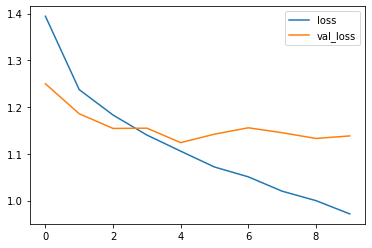

In [13]:
plt.plot(vgg16_model.history.history['loss'] , label = 'loss')
plt.plot(vgg16_model.history.history['val_loss'] , label = 'val_loss')
plt.legend()

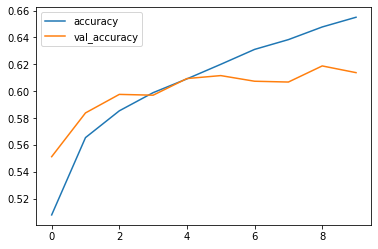

In [14]:
plt.plot(vgg16_model.history.history['accuracy'] , label = 'accuracy')
plt.plot(vgg16_model.history.history['val_accuracy'] , label = 'val_accuracy')
plt.legend()

In [17]:
vgg16_model.evaluate(X_test, y_test) # Too bad score. But I just tried transfer learning in this notebook.

313/313 [==============================] - 3s 10ms/step - loss: 1.1746 - accuracy: 0.5969


[1.174647331237793, 0.5968999862670898]

In [18]:
y_pred = vgg16_model.predict(X_test).argmax(axis=1)

313/313 [==============================] - 3s 8ms/step


In [19]:
label = ['airplane',
'automobile',
'bird',
'cat',
'deer',
'dog',
'frog',
'horse',
'ship',
'truck']

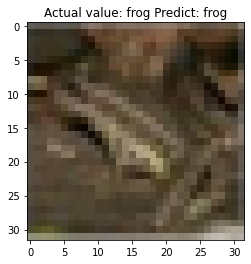

In [21]:
import random

i = random.randint(0, 9999)

plt.imshow(X_test[i])

l1 = label[y_test[i]]

l2 = label[y_pred[i]]
plt.title(f"Actual value: {l1} Predict: {l2}" );

In [ ]:
# Done